# Сборный проект. Анализ компьютерных игр для интернет-магазина.

Необходимо провести анализ исторических данных о продажах игр, оценки пользователей и экспертов, жанров и платформы для 
интернет-магазина «Стримчик». Нашей задачей является выявление определяющих успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У нас имеются данные до 2016 года. Пусть сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Описание данных***

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Инструкция по выполнению проекта**

Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv.

Шаг 2. Подготовьте данные

* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод

## 1. Изучение и подготовка данных из файла

#### 1.1 Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st

#### 1.2 Обзор данных

In [2]:
# загружаем файлы с данными

try:
    games = pd.read_csv('games.csv')
except FileNotFoundError:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games.duplicated().sum()

0

Имеются пропущенные данные.  
Названия столбцов имеют разные регистры.  
Дубликаты отсутствуют.

#### 1.3 Подготовка данных

In [7]:
# Приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# Посмотрим на количество пропусков в процентах
pd.DataFrame(round((games.isna().mean()*100), 2))

,0
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


Пропусков по названию, жанру и году релиза очень мало, поэтому удалим пропуски. На наши данные это сильно не повлияет.

In [9]:
games = games.dropna(subset = ['name', 'genre', 'year_of_release'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [10]:
# Преобразуем данные в нужные типы

# Год приведем к целочисленному значению
games['year_of_release'] = games['year_of_release'].astype(int)

Пропущенных значений в столбцах очень много, рейтинга можно заменитьё на маркер, например нулем. Здесь неккоректно заменять рейтинг на медиану или среднее, чтобы не искажать проставленные оценки.

In [11]:
# Проверим, чтобы эти столбцы не содержали ноль
# print('Количество нулевых значений в столбце critic_score:', len(games[games['critic_score']==0])) 
# print('Количество нулевых значений в столбце user_score:',len(games[games['user_score']==0]))
# print('Количество нулевых значений в столбце rating:',len(games[games['rating']==0]))

In [12]:
# Столбец 'user_score' содерит значения tbd, которое мешает приведению к типу float
games[games['user_score'] == 'tbd']['user_score'].count()

2376

tbd (to be determined) - рейтинг, который будет посчитан позже, то есть на момент выгрузки данных его нет, и данное значение равносильно незаполненным значениям nan.

In [13]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
# Нулей нет, заменим пропуски маркерами: -1 для числовых значение и "not rated" для рейтинга текстом
games[['critic_score', 'user_score']] = games[['critic_score', 'user_score']].fillna(-1)
games['rating'] = games['rating'].fillna('not rated')

In [16]:
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2621,Naruto Shippuden: Ultimate Ninja Storm 2,X360,2010,Fighting,0.43,0.27,0.01,0.07,74.0,8.5,T
9726,Bomberman Party Edition,PS,1998,Puzzle,0.07,0.05,0.00,0.01,79.0,8.3,E
5985,NieR,X360,2010,Role-Playing,0.13,0.10,0.04,0.02,67.0,8.3,M
5334,MLB 06: The Show,PSP,2006,Sports,0.32,0.00,0.00,0.03,83.0,8.5,E
3765,Blitz: The League,XB,2004,Sports,0.40,0.11,0.00,0.02,78.0,7.7,M
1073,NFL GameDay 98,PS,1997,Sports,1.58,0.06,0.00,0.04,-1.0,-1.0,not rated
787,Tetris DS,DS,2006,Puzzle,0.63,0.05,1.35,0.08,84.0,8.7,E
11766,In The Groove,PS2,2005,Misc,0.04,0.03,0.00,0.01,72.0,9.0,E
5621,Frogger's Adventures: The Rescue,PS2,2003,Platform,0.16,0.12,0.00,0.04,59.0,8.5,E
8041,Ringling Bros. and Barnum & Bailey Circus,Wii,2009,Action,0.17,0.00,0.00,0.01,-1.0,-1.0,not rated


**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [17]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#### 1.4 Вывод

Названия колонок привели к нижнему регистру.  
Удалили пропущенные значения по названиям, жанрам  и годом релиза (т.к. пропущенных значений  крайне мало).  
Год выпуска изменили на целочисленный тип 'int'.
Пропущенные рейтинги заменили маркером ноль, а в столбце 'user_score' значения tbd заменили на Nan, и привели столбец к 'float'. 
Рассчитали суммарныее продажи по всем регионам и добавили их в новый столбец 'total_sales'.

In [18]:
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name  : к

## 2. Исследовательский анализ данных

#### 2.1 Посмотрим, сколько игр выпускалось в разные годы

In [19]:
games_per_year = games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
games_per_year.columns = ['year_of_release', 'count']
games_per_year

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


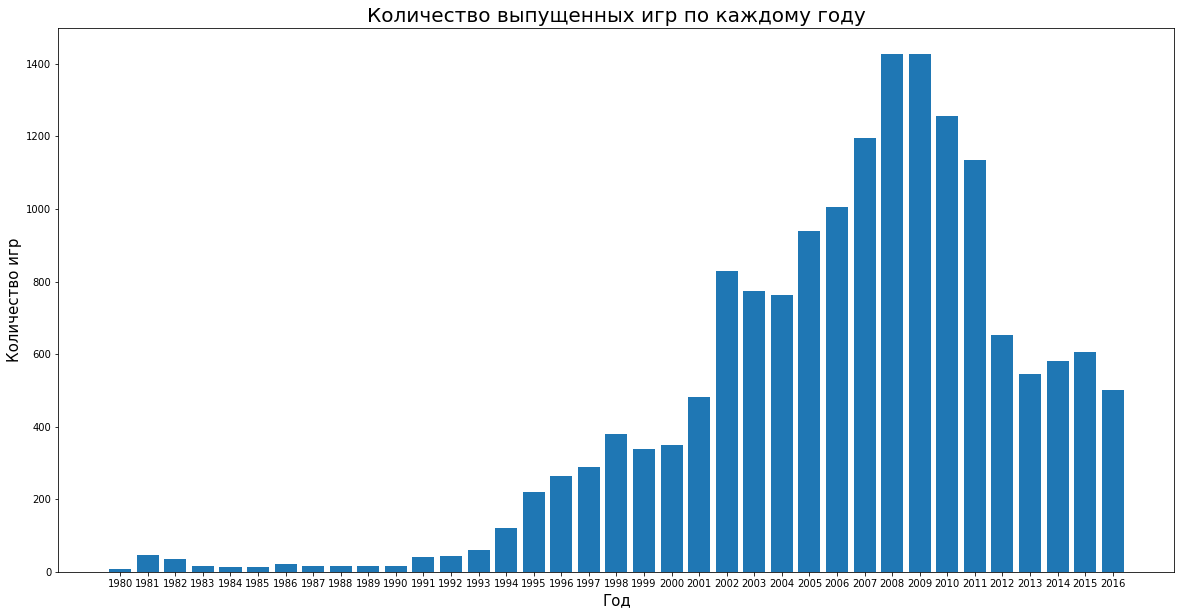

In [20]:
plt.figure(figsize=(20,10))
height = games_per_year['count']
bars = games_per_year['year_of_release']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel('Год', size=15)
plt.ylabel('Количество игр', size=15)
plt.title('Количество выпущенных игр по каждому году', size=20)

plt.show()

По графику видим, что 1980-1993 годы выпускалось наименьшее количество игр, вычислительные мощности только начинали развиваться. Эти данные не очень важны, т.к. выборка небольшая и их анализ не даст объективных результатов.   
Далее игровая индустрия развивается вплоть до 2008 года.  
2008 и 2009 - года с максимальным количеством выпущенных игр - пик игровой индустри.  
Возможно это связано с тем, что игровая индустрия имела очень много идей для разработки игр разного жанра и сюжетов, собсвенно поэтому был выпуск большого количества разных игр.  
После 2009 года и до 2016 выпуск игр практически с каждым годом становится все меньше.  
После 2009 возможно идей для новых игр становится меньше, и игровая индустрия начала уделять больше внимания качеству игр, нежели количеству.

#### 2.2 Посмотрим, как менялись продажи по платформам

In [21]:
games_platforms = games.pivot_table(index = 'platform',  values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending= False)
games_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [22]:
#Отберем платформы, продажи которых выше 75 процентиля
low_limit = games_platforms.quantile(0.75)[0]
low_limit

301.20499999999674

In [23]:
# Список топ платформ
top_platforms = list(games_platforms.query('total_sales > @low_limit').index)
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

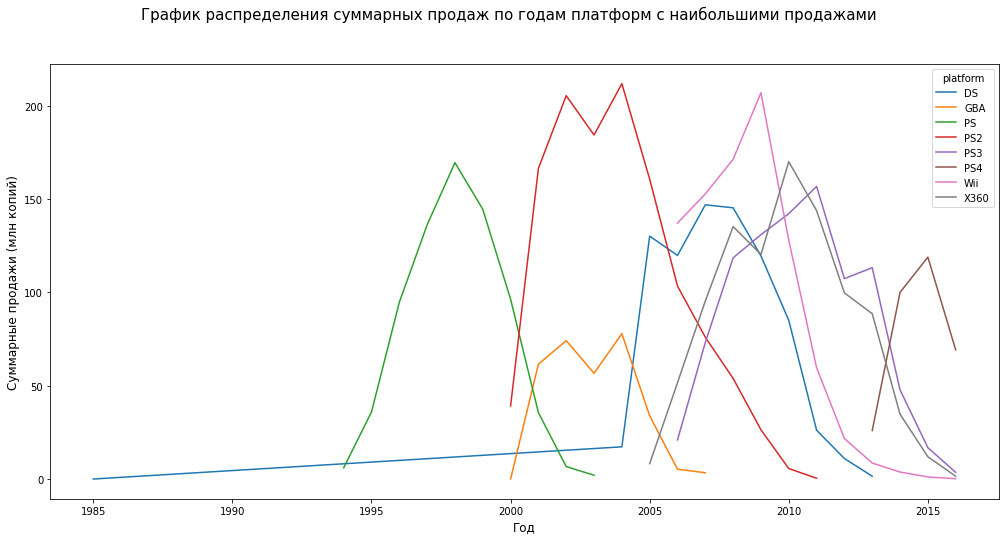

In [24]:
# Построим график продаж 
top_platforms_data = games[games['platform'].isin(top_platforms)].groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(17, 8))
plt.suptitle('График распределения суммарных продаж по годам платформ с наибольшими продажами', size=15)
sns.lineplot(data = top_platforms_data, x='year_of_release', y='total_sales', hue='platform')
plt.xlabel('Год', size=12)
plt.ylabel('Суммарные продажи (млн копий)', size=12)
plt.show()

До 1994 платформа DS была единственной на рынке.  
Затем почти через каждые 5 лет появляются новые платформы. В средне каждая платформа живет в среднем 10 лет, по мере выхода новых платформ вострбованность старых снижается  
Playstation 3 -  cамая крупная по продажам. 
Пики продаж приходятся на PS2 в 2004 году и Wii в 2009.

#### 2.3 Возьмим данные за соответствующий актуальный период
Актуальным периодом будем считать 2013-2016 года, которые помогут нам спрогнозировать спрос на 2017 год

In [25]:
games_actual = games[games['year_of_release'] > 2012]

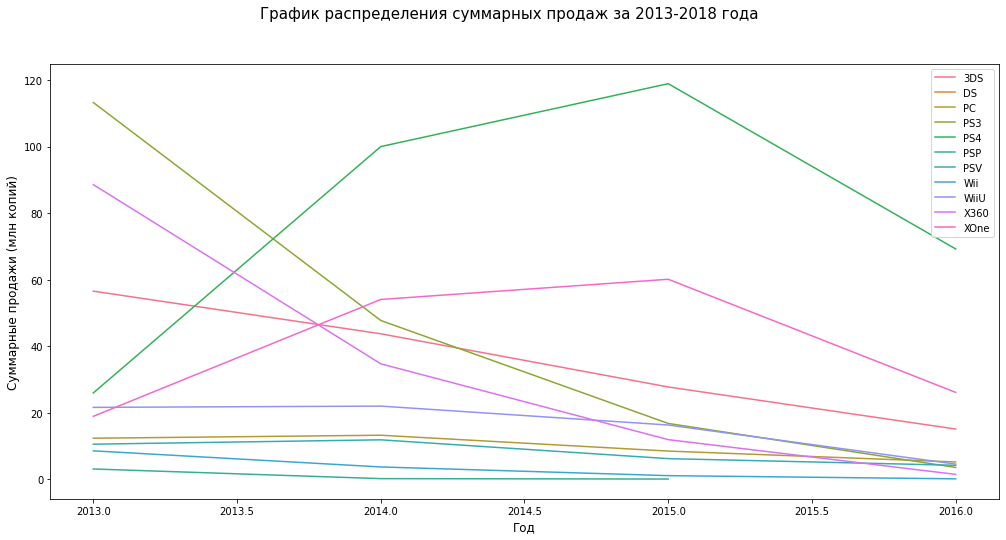

In [26]:
# Построим график продаж
actual_data = games_actual.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(17, 8))
plt.suptitle('График распределения суммарных продаж за 2013-2018 года', size=15)
sns.lineplot(data = actual_data, x='year_of_release', y='total_sales', hue='platform')
plt.xlabel('Год', size=12)
plt.ylabel('Суммарные продажи (млн копий)', size=12)
plt.legend()
plt.show()

По построенному графику видим, что, хотя к 2016 году суммарные продажи по всем платформам шли на спад, наиболее  прибыльными оказались PS4 и XOne.  
Пик популярности X360 и PS3 прошел, и им на смену пришло новое поколение.

#### 2.4 Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [27]:
# Выберем потенциально прибыльные платформы
#Отберем платформы, продажи которых выше 75 процентиля в 2013-2016 годах
low_limit_act = actual_data.quantile(0.75)[1]
low_limit_act

36.995000000000005

In [28]:
top_platform_actual_data = actual_data.query('total_sales > @low_limit_act')
top_platforms_act = list(top_platform_actual_data['platform'].unique())
top_platforms_act

['3DS', 'PS3', 'PS4', 'X360', 'XOne']

Text(0, 0.5, 'Суммарные продажи (млн копий)')

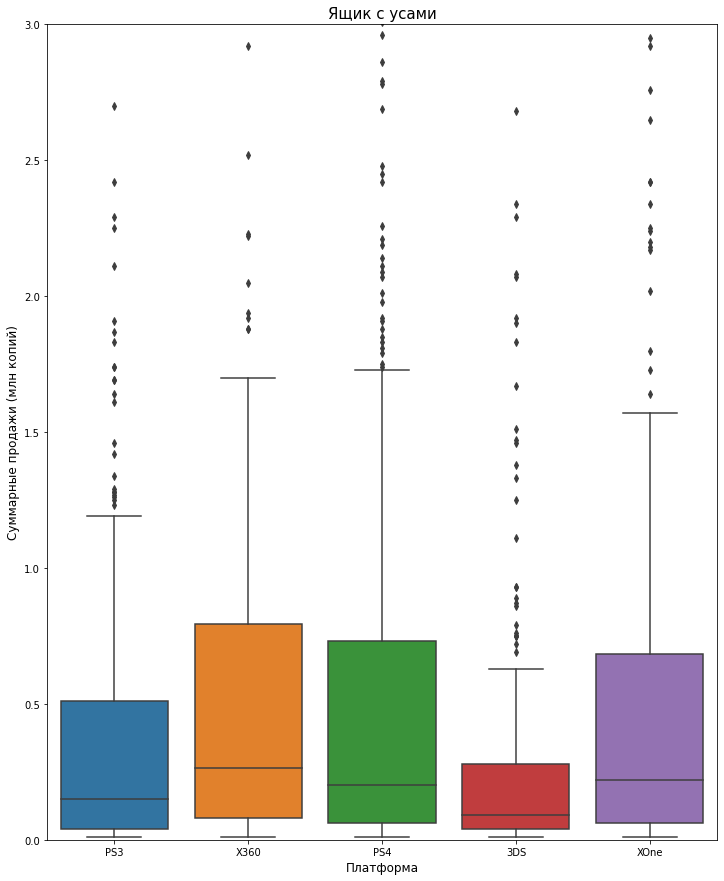

In [29]:
plt.figure(figsize=(12,15))
plt.ylim(0, 3)
sns.boxplot(data=games_actual[games_actual['platform'].isin(top_platforms_act)], x='platform', y='total_sales')
plt.title('Ящик с усами', size = 15)
plt.xlabel('Платформа', size = 12)
plt.ylabel('Суммарные продажи (млн копий)', size = 12)

Видим, что на каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений.  
Самые восстребованные платформы - это серии Playstation и XBox (боксплоты самые растянутые). Это самые популярные консоли и на них выбор игр всегда был большим.   
Nintendo 3DS менее популярная, но тоже находит своего покупателя.

#### 2.5 Помотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Построим диаграммы рассеивания и матрицу корреляции для платформы PS4.

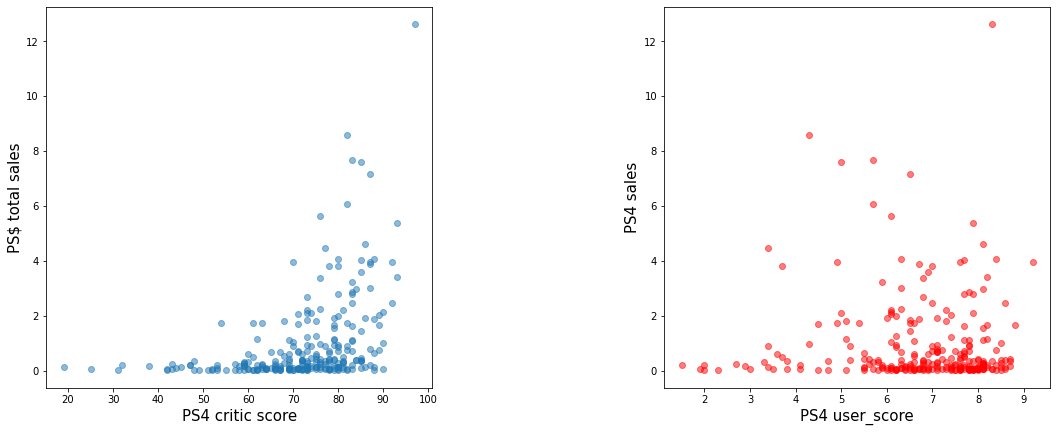

In [30]:
data_PS4 = games_actual[games_actual['platform'] == 'PS4']
plt.figure(figsize=(18,7))

data_PS4_critic = data_PS4[data_PS4['critic_score'] != -1]
data_PS4_user = data_PS4[data_PS4['user_score'] != -1]

plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.6, hspace=0)
plt.scatter(x=data_PS4_critic['critic_score'], y=data_PS4_critic['total_sales'], alpha=0.5)
plt.xlabel('PS4 critic score',fontsize=15)
plt.ylabel('PS$ total sales',fontsize=15)
                

plt.subplot(1, 2, 2)
plt.scatter(x=data_PS4_user['user_score'], y=data_PS4_user['total_sales'],  c='r', alpha=0.5)
plt.xlabel('PS4 user_score',fontsize=15)
plt.ylabel('PS4 sales',fontsize=15)
plt.show()

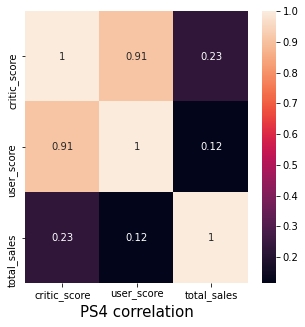

In [31]:
plt.figure(figsize=(5,5))
sns.heatmap(data_PS4[['critic_score','user_score','total_sales']].corr(), annot = True)
plt.xlabel("PS4 correlation",fontsize=15)
plt.show()

Из матрицы корреляции видим, что
 - корреляция между **отзывами пользователей и продажами** очень слабая
 - корреляция между **отзывами критиков и продажами** слабая 
 
Существуют игры с высоким рейтингом, но c небольшими продажами. Но есть отдельные очень удачные игры (их немного), которые хорошо продаются и имеют высокий рейтинг.  
На графике видим одну игру, суммарные продажи по которой составили почти 12,5 млн и которая имее доводб высокие оценки.

#### 2.6 Соотнесем выводы с продажами игр на других платформах

3DS


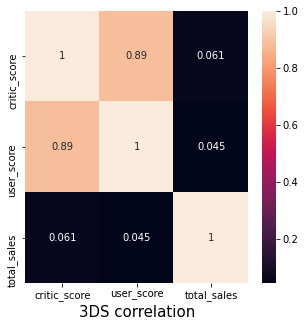

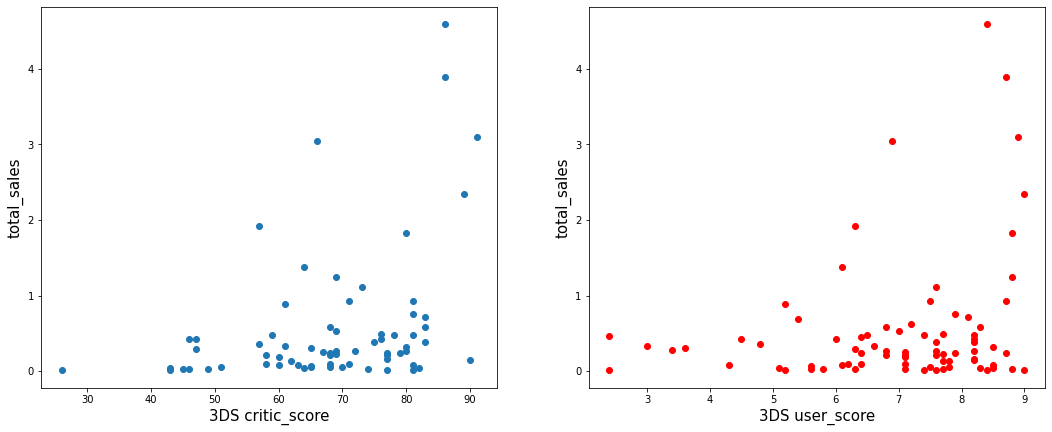

PS3


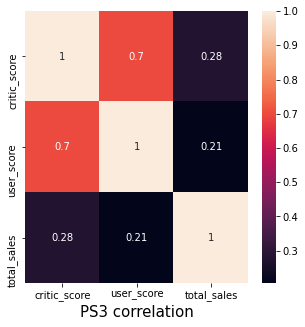

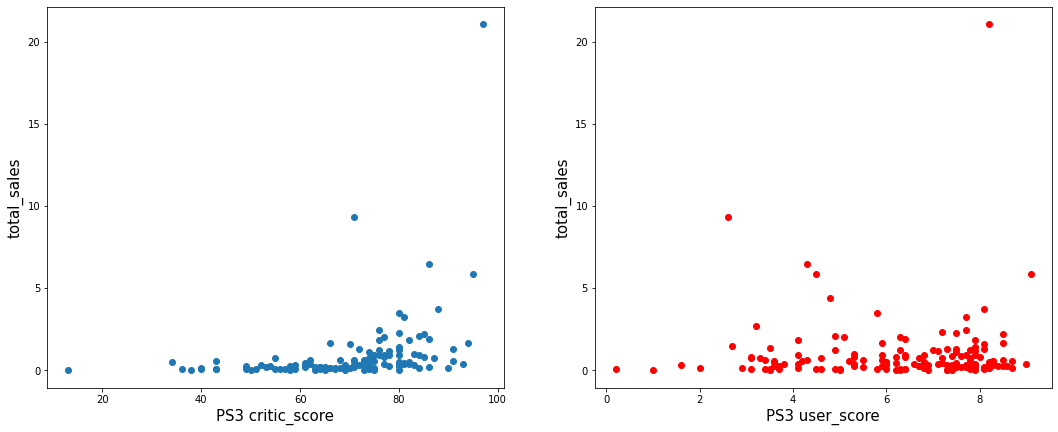

PS4


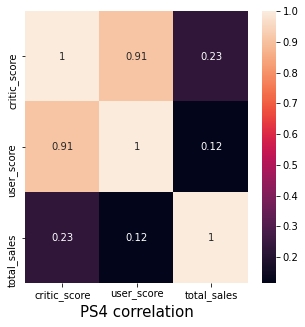

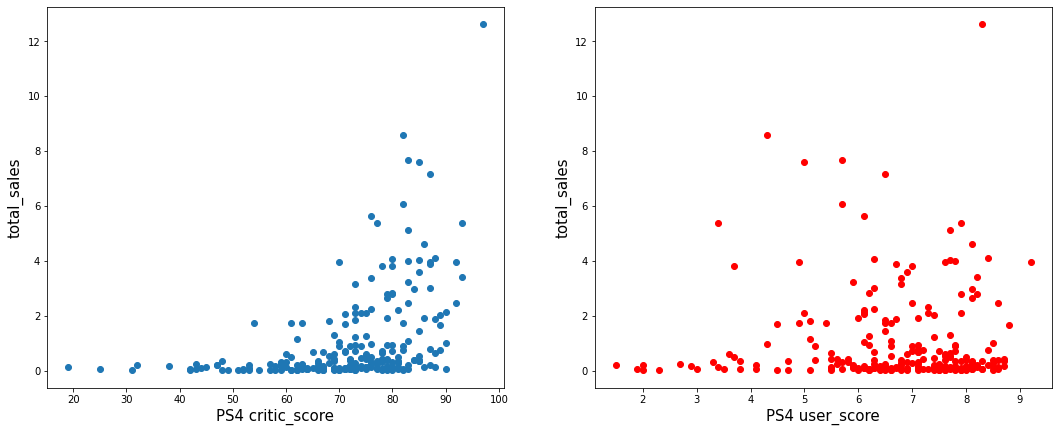

X360


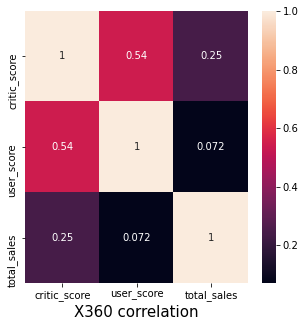

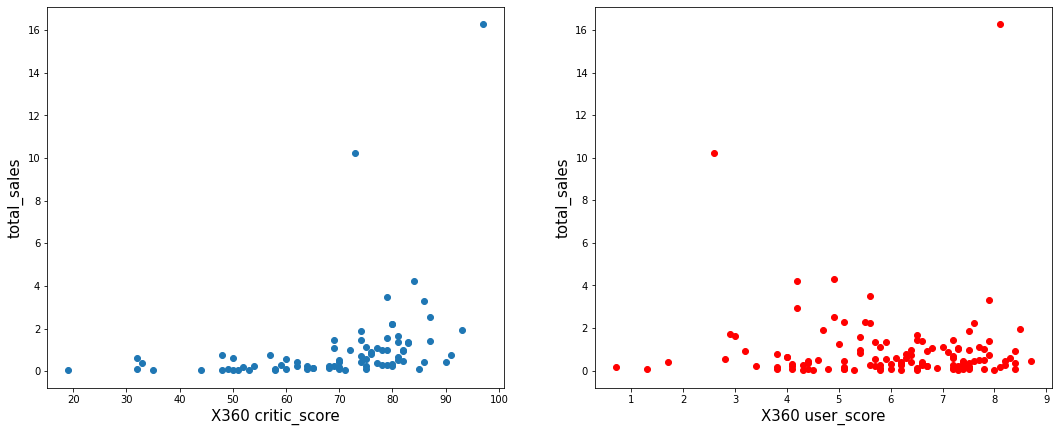

XOne


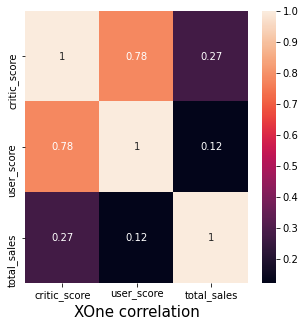

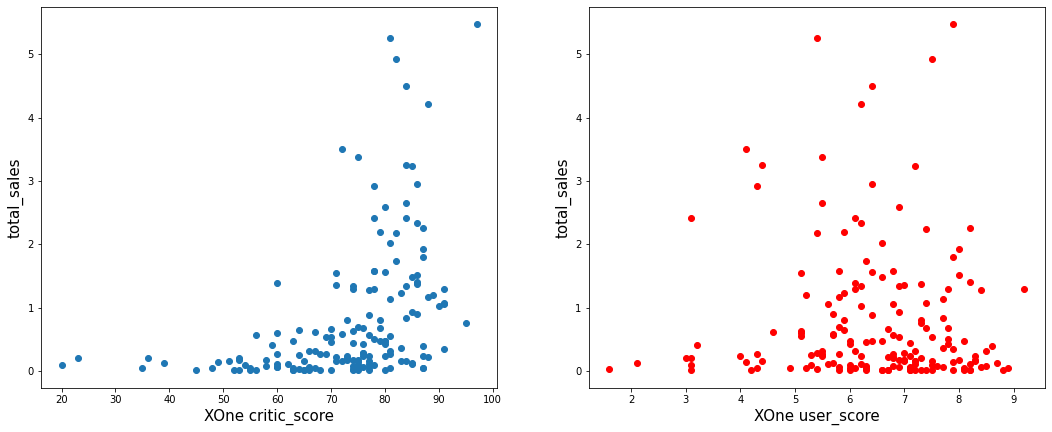

In [32]:
for platform in top_platforms_act:
    print(platform)
    data_platform = games_actual[games_actual['platform'] == platform]
    platform_score = data_platform.groupby(['user_score', 'critic_score']).agg({'total_sales':'sum'}).reset_index()
    plt.figure(figsize=(5,5))
    sns.heatmap(data_platform[['critic_score','user_score','total_sales']].corr(), annot = True)
    plt.xlabel(platform + " correlation",fontsize=15)
    plt.show()
    
    plt.figure(figsize=(18,7))
    
    platform_score_critic = platform_score[platform_score['critic_score'] != -1]
    platform_score_user = platform_score[platform_score['user_score'] != -1]
    
    plt.subplot(121)
    #plt.subplots_adjust(wspace=0.6, hspace=0)
    plt.scatter(platform_score_critic['critic_score'], platform_score_critic['total_sales'])
    plt.xlabel(platform +' critic_score',fontsize=15)
    plt.ylabel('total_sales',fontsize=15)
        

    plt.subplot(122)
    plt.scatter(platform_score_user['user_score'], platform_score_user['total_sales'], color="red")
    plt.xlabel(platform+' user_score',fontsize=15)
    plt.ylabel('total_sales',fontsize=15)
    plt.show()    
        #platform_score.plot('critic_score', 'total_sales', kind='scatter',)  
    #pd.plotting.scatter_matrix(platform_score, figsize=(12, 12), alpha=0.5)

По всем платформам корелляция между оценками критиков/пользователей и продажами примерно одинакова.  
Корреляция между оценками критиков и продажами выше чем корреляция между оценками пользователей и продажами. 
Это означает что покупатели ориентируются на отзывы критиков, нежели других пользователей.

#### 2.7 Посмотрим на общее распределение игр по жанрам

In [33]:
# Cгруппируем продажи по жанрам
group_genre = games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
group_genre.reset_index()
group_genre

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Text(0.5, 1.0, 'Суммарный объём продаж по игровым жанрам')

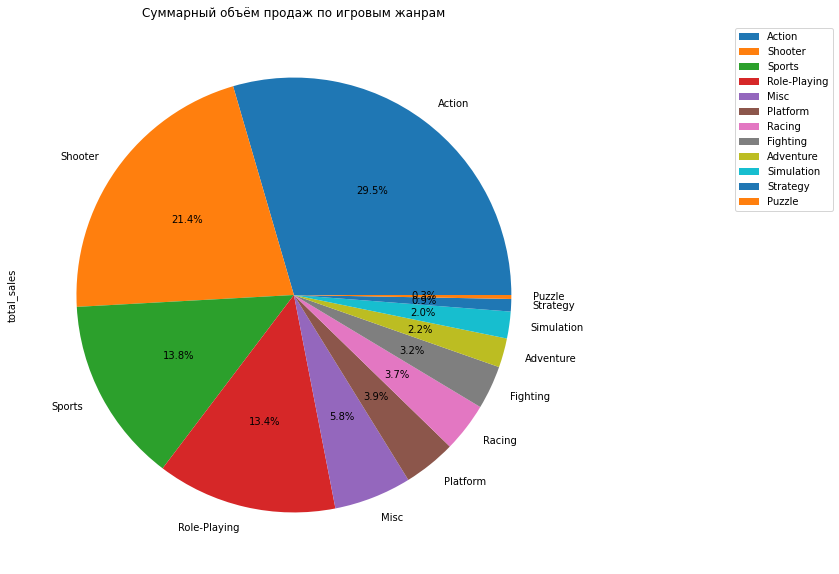

In [34]:
# Построим круговую диграмму распределения игр по жанрам
group_genre.plot(y="total_sales", kind="pie", figsize=(10, 10), autopct='%1.1f%%')

plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Суммарный объём продаж по игровым жанрам')

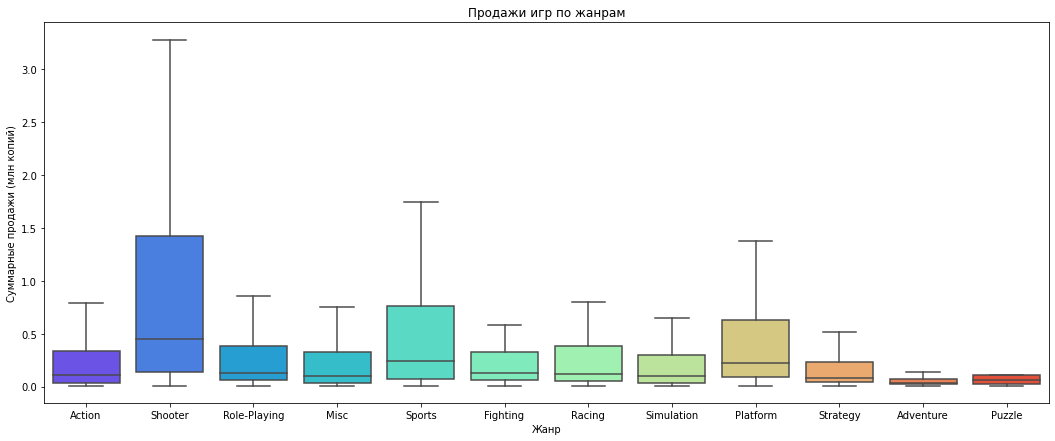

In [35]:
# Построим боксплоты по продажам разбивкой по жанрам.
fig = plt.subplots(figsize=(18,7))
plt.title("Продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games_actual, palette='rainbow', showfliers=False)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (млн копий)')
plt.show()

Самый продаваемый жанр игр в жанре Shooter, меньше всего продаж игр в жанре Adventure.

## 3. Составление портрета пользователя каждого региона

In [36]:
# Напишим функцию для подсчета продаж в зависимости от какой-либо категории для определенного региона

def region_profile(region, category):
    top_platform = (games_actual.pivot_table(index=category,values=region, aggfunc = 'sum')
         .sort_values(by=region,ascending=False).head()).plot(kind='bar')
    
    (games_actual
    .pivot_table(index=category, values=region, aggfunc="sum")
    .sort_values(region, ascending=False)
    .head()
    .plot(y=region, kind="pie", figsize=(8, 8),title='Распределение рынка', autopct='%1.1f%%')
    )
    plt.legend(bbox_to_anchor=(0.7, 0, 0.5, 1))
    plt.show()

#### 3.1 Северная Америка

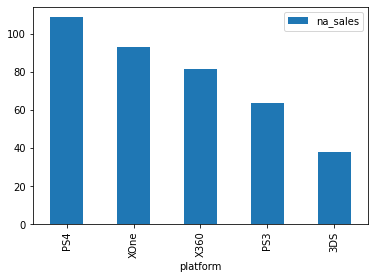

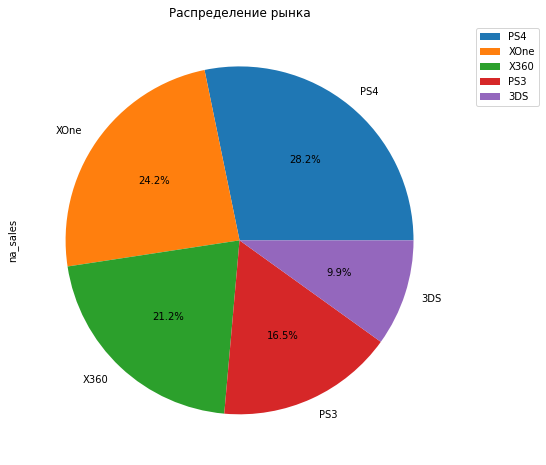

In [37]:
# Продажи в зависимости от платформы в Северной Америке
region_profile('na_sales','platform')

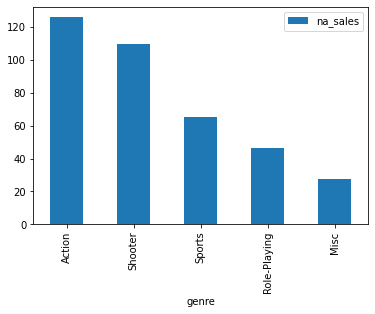

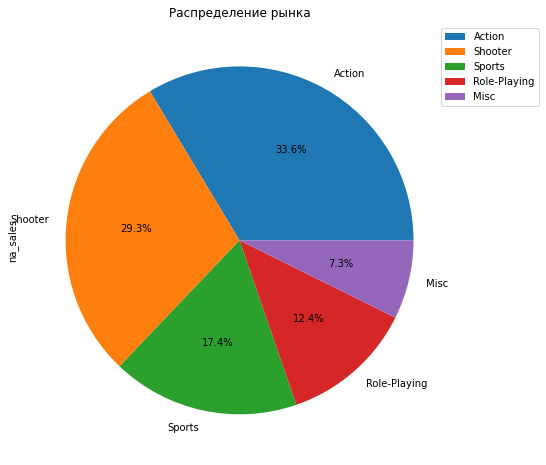

In [38]:
# Продажи в зависимости от жанра в Северной Америке
region_profile('na_sales','genre')

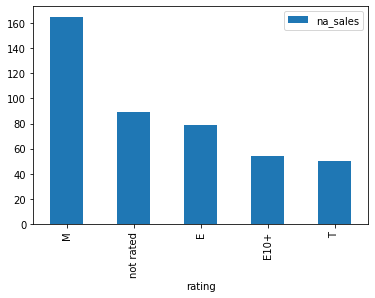

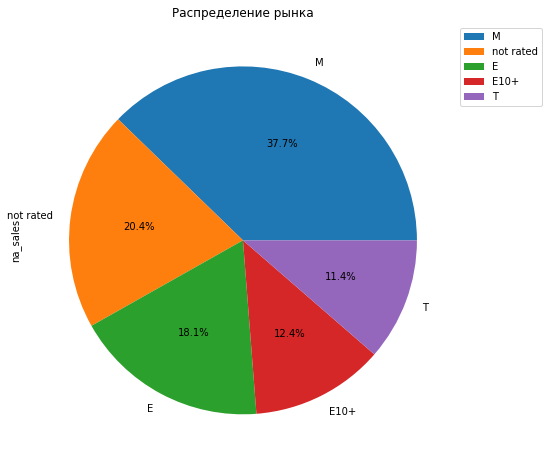

In [39]:
# Продажи в зависимости от рейтинга в Северной Америке
region_profile('na_sales','rating')

**Северная Америка** :
 - Самая популярная платформа - PS4;
 - Самый популярный жанр - Action;
 - Рейтинг ESRB влияет на объём продаж игр в регионе: наиболее продаваемыми играми являются игры c рейтингом M.

#### 3.2 Европа

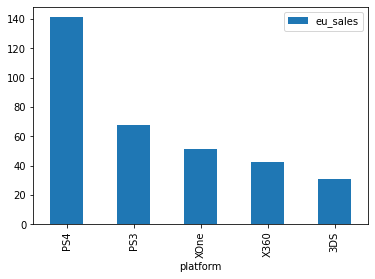

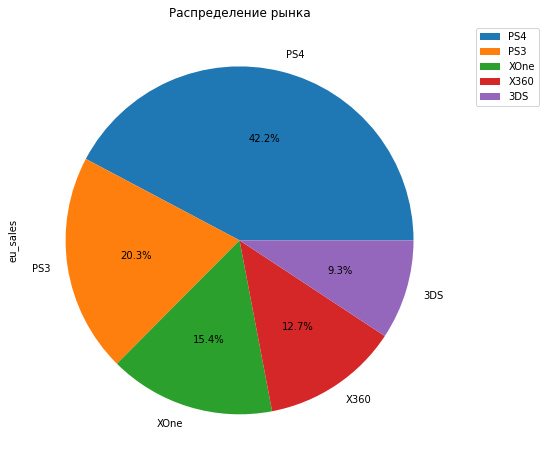

In [40]:
# Продажи в зависимости от платформы в Европе
region_profile('eu_sales','platform')

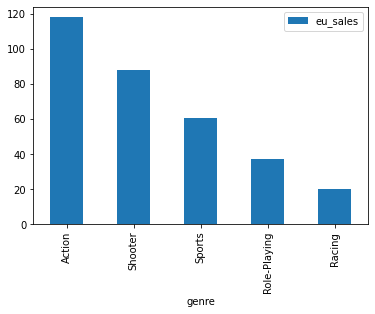

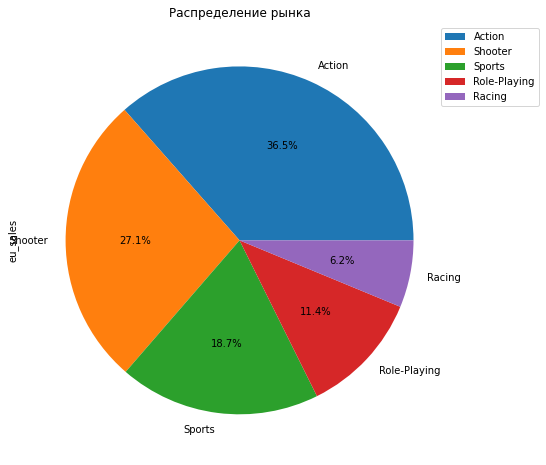

In [41]:
# Продажи в зависимости от жанра в Европе
region_profile('eu_sales','genre')

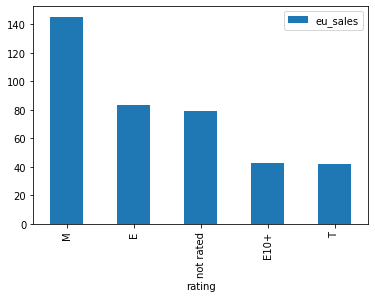

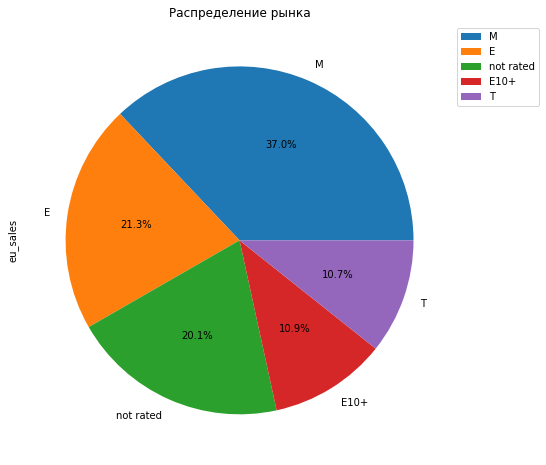

In [42]:
# Продажи в зависимости от рейтинга в Европе
region_profile('eu_sales','rating')

**Европа** :
 - Самая популярная платформа - PS4;
 - Самый популярный жанр - Action;
 - Рейтинг ESRB влияет на объём продаж игр в регионе: наиболее продаваемыми играми являются игры c рейтингом E ("для всех").
 
Систуация схожа с американским рынком

#### 3.3 Япония

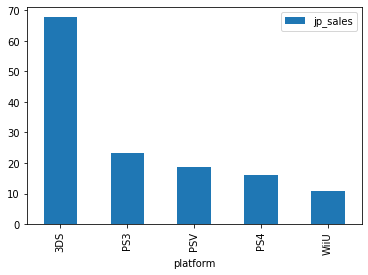

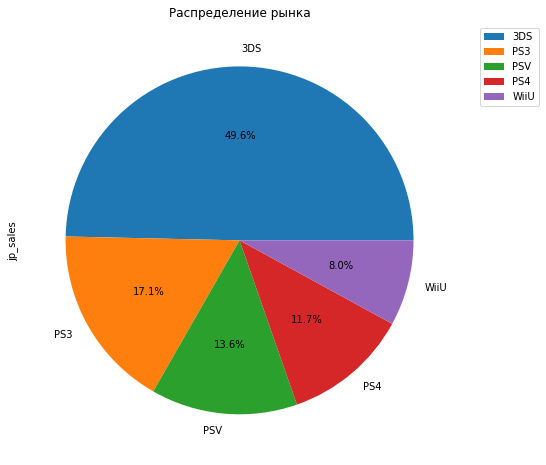

In [43]:
# Продажи в зависимости от платформы в Японии
region_profile('jp_sales','platform')

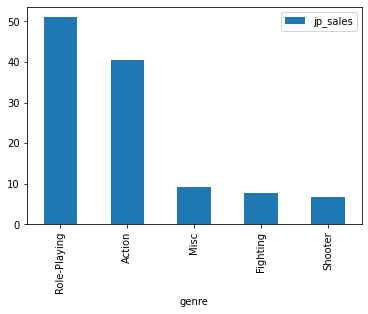

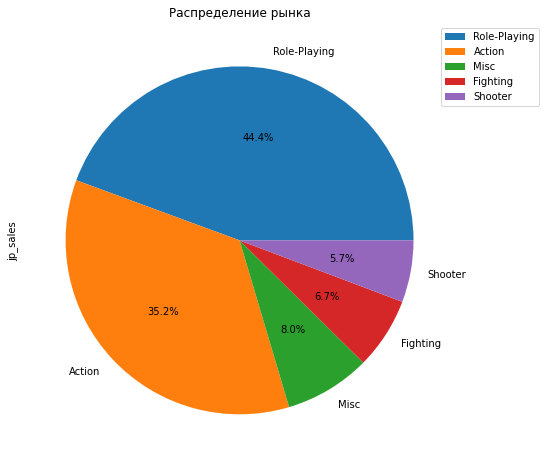

In [44]:
# Продажи в зависимости от жанра в Японии
region_profile('jp_sales','genre')

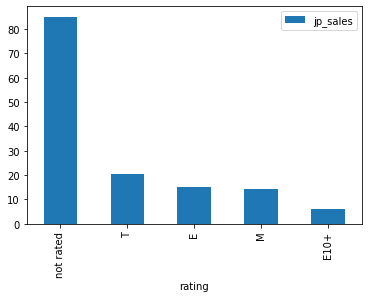

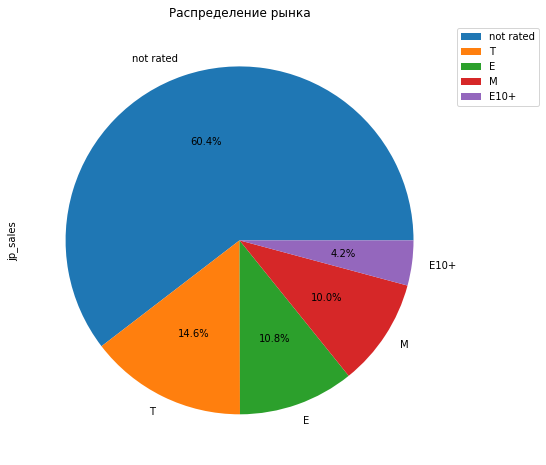

In [45]:
# Продажи в зависимости от рейтинга в Японии
region_profile('jp_sales','rating')

**Япония** :
 - Самая популярная платформа - 3DS;
 - Самый популярный жанр - Role-Playing;
 - Рейтинг ESRB не сильно влияет на объём продаж игр в регионе: наиболее продаваемыми играми являются игры без рейтинга.

## 4. Проверка гипотез

*Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.*

#### 4.1 Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сформулируем нулевую и альтернативную гипотезы:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [46]:
# Примем 
alpha = .05

In [47]:
# Сформируем соответсвующие выборки, удалим пропущенные значения
sample_1 = games_actual[(games_actual['platform'] == 'XOne') & (games_actual['user_score'] != -1)]['user_score'].dropna()
sample_2 = games_actual[(games_actual['platform'] == 'PC')  & (games_actual['user_score'] != -1)]['user_score'].dropna()

In [48]:
sample_1.min(), sample_2.min()

(1.6, 1.4)

In [49]:
results = st.ttest_ind(sample_1, sample_2)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Получили, что средние пользовательские рейтинги платформ Xbox One и PC не различаются.
Если игры для ПК имеют определенный рейтинг, то и на другой платформе будет схожий с ним рейтинг.

#### 4.2 Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные"

Сформулируем нулевую и альтернативную гипотезы:
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [50]:
# Примем 
alpha = .05

In [51]:
# Сформируем соответсвующие выборки, удалим пропущенные значения
sample_1 = games_actual[(games_actual['genre'] == 'Action') & (games_actual['user_score'] != -1)]['user_score'].dropna()
sample_2 = games_actual[(games_actual['genre'] == 'Sports') & (games_actual['user_score'] != -1)]['user_score'].dropna()

In [52]:
results = st.ttest_ind(sample_1, sample_2)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Получили, что средние пользовательские рейтинги жанров Action и Sports различаются

## 5. Выводы
1. Развитие игровой индустрии началось с 1994 г.
2. Разные платформы были популярны в разное время.
3. Топ по продажам были 2009-2010 года.
4. При выборе игр покупатели больше доверят оценкам критиков, нежели других пользователей.
5. Самые продаваемые игры - игры для платформ XBox и playStation.
6. Самые популярные жанры: Action, Sports, жанры с минимальными продажами: Strategy, Puzzle.
7. Пользователи из Северной Америки и Европы схожи в своих предпочтениях: Playstation и игры в жанре Action. В Японии предпочитают 3DS и игры в жанре Role-Playing.
8. Средние пользовательские рейтинги платформ Xbox One и PC не различаются.
9. Средние пользовательские рейтинги жанров Action и Sports не различаются.